# Analisi di una corsa da 10 km
In questa breve analisi vorrei spiegare il processo per importare i dati di una corsa da Garmin Connect e la loro visualizzazione con Pandas e Matplotlib.

Inizialmente importo le librerie di Pandas e Matplotlib, poi sfrutto il comando pd.read_csv di Pandas per importare il csv nel mio notebook.
Il csv si può scaricare facilmente dal sito Garmin Connect: si può esportare csv di una singola attività (come in questo caso), oppure il database di tutte le attività effettuate con i valori riassuntivi delle singole gare.

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

corsa=pd.read_csv("dati/activity_11056454360.csv", 
                  dtype={"FC Media":"float64"})
corsa

,Lap,Tempo,Tempo cumulato,Distanza,Passo medio,GAP medio,FC Media,FC max,Ascesa totale,Discesa totale,...,Media bilanciamento TCS,Lunghezza media passo,Oscillazione verticale media,Rapporto verticale medio,Calorie,Temperatura med,Passo migliore,Cadenza di corsa max,Tempo in movimento,Passo medio in movimento
0,1,7:08.1,"7:08,1","1,00",7:08,NaN,135.0,149,NaN,NaN,...,NaN,"0,87",NaN,NaN,72,NaN,6:37,171,7:08,7:08
1,2,6:50.2,13:58,"1,00",6:50,NaN,150.0,154,7.0,13.0,...,NaN,"0,92",NaN,NaN,76,NaN,6:34,165,"6:50,2",6:50
2,3,6:46.5,20:45,"1,00",6:47,NaN,156.0,161,15.0,10.0,...,NaN,"0,93",NaN,NaN,77,NaN,6:24,161,"6:46,5",6:47
3,4,6:54.4,27:39,"1,00",6:54,NaN,157.0,163,11.0,13.0,...,NaN,"0,91",NaN,NaN,75,NaN,6:41,161,6:54,6:54
4,5,7:08.0,34:47,"1,00",7:08,NaN,157.0,161,11.0,9.0,...,NaN,"0,90",NaN,NaN,76,NaN,6:46,161,7:08,7:08
5,6,7:04.1,41:51,"1,00",7:04,NaN,160.0,164,7.0,NaN,...,NaN,"0,91",NaN,NaN,75,NaN,6:51,159,"7:04,1",7:04
6,7,7:10.3,49:02,"1,00",7:10,NaN,162.0,166,5.0,5.0,...,NaN,"0,89",NaN,NaN,77,NaN,6:51,161,7:10,7:10
7,8,7:04.4,56:06,"1,00",7:04,NaN,164.0,167,NaN,16.0,...,NaN,"0,90",NaN,NaN,77,NaN,6:49,161,7:04,7:04
8,9,6:59.8,1:03:06,"1,00",7:00,NaN,168.0,170,9.0,NaN,...,NaN,"0,90",NaN,NaN,78,NaN,6:47,163,"6:59,8",7:00
9,10,6:42.2,1:09:48,"1,00",6:42,NaN,171.0,177,NaN,2.0,...,NaN,"0,92",NaN,NaN,77,NaN,6:08,172,6:42,6:42


## Sistemazione dataframe
Virgole e zeri per timedelta

In [122]:
corsa=corsa.replace(",",".", regex=True)
corsa["Tempo"]="00:"+ corsa["Tempo"]
corsa.loc[corsa["Tempo cumulato"].str.count(':')<=1, "Tempo cumulato"]="00:"+ corsa["Tempo cumulato"]

Trasformo le colonne tempi in timedelta

In [123]:
corsa["Tempo"]=pd.to_timedelta(corsa["Tempo"])
corsa["Tempo cumulato"]=pd.to_timedelta(corsa["Tempo cumulato"])

Creo colonna FC Media su Tempo cumulato

In [128]:
corsa["FC Media / Tempo"]=corsa["FC Media"]/corsa["Tempo"].dt.total_seconds()

## Plot
Grafico sull'andamento del battito cardiaco all'interno di una singola corsa di 10k  
Come ci si può aspettare la frequenza cardiaca media aumenta all'aumentare della distanza percorsa.

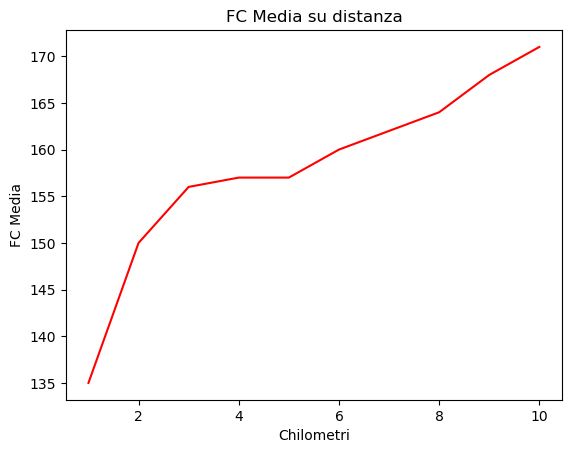

In [126]:
fig, ax = plt.subplots()
ax.plot(corsa["Lap"],corsa["FC Media"], color="red")
ax.set_title("FC Media su distanza")
ax.set_ylabel("FC Media")
ax.set_xlabel("Chilometri")
plt.style.use("default")
plt.show()

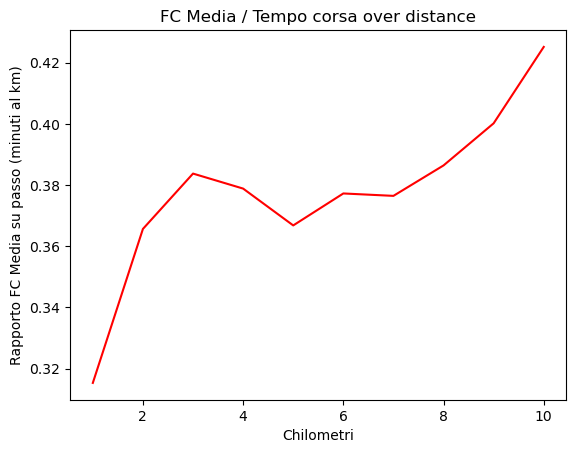

In [131]:
fig, ax = plt.subplots()
ax.plot(corsa["Lap"],corsa["FC Media / Tempo"], color="red")
ax.set_title("FC Media / Tempo corsa over distance")
ax.set_ylabel("Rapporto FC Media su passo (minuti al km)")
ax.set_xlabel("Chilometri")
plt.style.use("default")
plt.show()